In [2]:
from coniii import *

C:\Users\Riickyyy\anaconda3\envs\coniii\lib\site-packages\coniii\samplers.py:381: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def iterate_neighbors(n,ix,expdJ,r):
C:\Users\Riickyyy\anaconda3\envs\coniii\lib\site-packages\coniii\samplers.py:2342: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def cross(vec1, vec2):


In [3]:
# Total Timeline T = 100
T = 500
# Number of neuros
N = 8

#Spike Apear Probability in Timeline 
Spikes_Probability = 0.1
#Number of Random Firing Timeline Points
N_tp = int(T * Spikes_Probability)
# Number of classify group
N_groups = 4

# Create Random Neuros Spikes Timeline (N_groups tpyes overall)
Random_NT = np.random.permutation(T)

# N_tp(10) random time points of firing for group i(overall is 4)
# Each Group Size is  (N_tp,1) contains the Random Firing Timeline Points
groups = []
for i in range(N_groups):
    start_index = i * N_tp
    end_index = (i + 1) * N_tp
    group = Random_NT[start_index:end_index]
    groups.append(group)

In [4]:
# Initializing Samples() to 0(8*10) and datatype
firing_rate = 0.8
samples = np.zeros((N,T), dtype = np.float32)

# Generate samples for each group
num_samples = int(N/N_groups)

for i, group in enumerate(groups):
    start_sample = int(num_samples * i)
    end_sample = int(num_samples * (i+1))
    samples[start_sample:end_sample, group] = (np.random.rand(num_samples, len(group)) < firing_rate)
    
# # Pick the Random Firing Timeline Points(set 2 * 10 ) in the Whole Samples
# # Use Bool to Control the T/F (1/0)
# samples[: int(N/N_groups), groups[0]] = (np.random.rand(int(N/N_groups),len(groups[0])) < firing_rate)
# samples[: int(N/N_groups), groups[1]] = (np.random.rand(int(N/N_groups),len(groups[1])) < firing_rate)
# samples[: int(N/N_groups), groups[2]] = (np.random.rand(int(N/N_groups),len(groups[2])) < firing_rate)
# samples[: int(N/N_groups), groups[3]] = (np.random.rand(int(N/N_groups),len(groups[3])) < firing_rate)

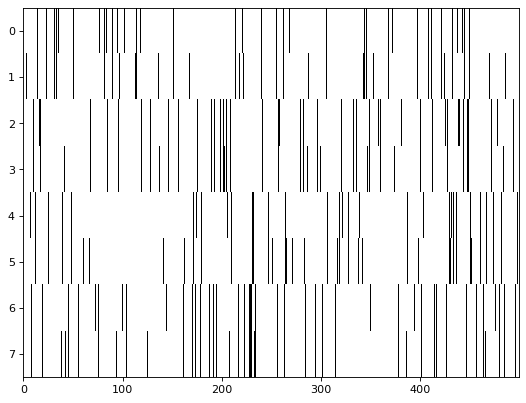

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6), dpi=80)
plt.imshow(samples, aspect="auto", cmap="gray_r", interpolation="none")

In [6]:
from coniii.utils import define_ising_helper_functions
from coniii import ClusterExpansion, pair_corr

import matplotlib.pyplot as plt
import numpy as np

In [7]:
calc_e, calc_observables, mchApproximation = define_ising_helper_functions()

In [8]:
samples.shape

(8, 500)

In [9]:
# Declare and call solver.
samples[samples == 0] = -1
solver = ClusterExpansion(samples.T)

multipliers, ent, clusters, deltaSdict, deltaJdict= solver.solve(threshold=1e-1, full_output=True)

C:\Users\Riickyyy\anaconda3\envs\coniii\lib\site-packages\coniii\solvers.py:96: UserWarning: Assuming that calc_observables should be for Ising model.
  if iprint: warn("Assuming that calc_observables should be for Ising model.")
C:\Users\Riickyyy\anaconda3\envs\coniii\lib\site-packages\coniii\samplers.py:1187: UserWarning: Boost C++ implementation not available. Defaulting to slower sampling methods.
  warn("Boost C++ implementation not available. Defaulting to slower sampling methods.")


adaptiveClusterExpansion: Clusters of size 2
adaptiveClusterExpansion: Clusters of size 3


In [10]:
multipliers

array([-0.7649114 , -0.68138436, -0.64572176, -0.64572176, -0.90884769,
       -0.5622741 , -0.70335268, -0.55951164,  1.09187463, -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        ,  1.36918126, -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        1.17834594, -0.        , -0.        , -0.        , -0.        ,
        1.45539138])

In [12]:
J = multipliers[N:]

# 创建一个 N*N 的零矩阵
matrix = np.zeros((N, N))

# # 使用数组的前N个元素填充对角线
# matrix[np.diag_indices(FISH_N)] = multipliers[:FISH_N]

# 使用数组的后N+2(N*N-1)个元素填充上半矩阵
index = N
for i in range(N):
    for j in range(i+1, N):
        matrix[i, j] = multipliers[index]
        index += 1
# 获取上半矩阵（包含对角线）
upper_matrix = np.triu(matrix)

# 转置上半矩阵并将其添加到下半部分
lower_matrix = np.transpose(upper_matrix)
lower_matrix = np.tril(lower_matrix, -1)

# 将上半矩阵和转置的下半矩阵相加得到完整的矩阵
final_matrix = upper_matrix + lower_matrix

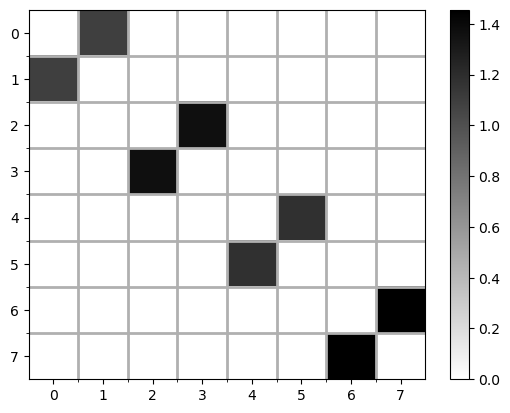

In [15]:
#plot imshow and add lines
plt.imshow(final_matrix, aspect="auto", cmap="gray_r")
ax = plt.gca() # 获取当前的坐标轴
ax.set_xticks([x-0.5 for x in range(1, final_matrix.shape[1])], minor=True) # 设置x轴的小刻度
ax.set_yticks([y-0.5 for y in range(1, final_matrix.shape[0])], minor=True) # 设置y轴的小刻度
plt.grid(which='minor', linestyle='-', linewidth=2)
plt.colorbar()